In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import pickle

from torchmetrics.regression import SymmetricMeanAbsolutePercentageError
import torch
import os
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn import linear_model
import numpy as np

In [2]:
def metric(y_pred, y_test):
    y_test = torch.FloatTensor(y_test)
    y_pred = torch.FloatTensor(y_pred)

    ad_smape = SymmetricMeanAbsolutePercentageError()
    smape_adjust = torch.mean(torch.stack([ad_smape(y_pred.detach().cpu()[i], y_test.detach().cpu()[i]) * 0.5 for i in range(len(y_test))]))
    return smape_adjust

In [3]:
data_path = '/home/smart01/SFLAB/su_GTM_t/GTM_T_sanguk/'
meta_df = pd.read_csv(os.path.join(data_path,'meta_data_image_text_nofilter.csv'), index_col='item_number')
meta_df = meta_df.drop(['sales_std'], axis=1)
# meta_df = pd.read_csv(os.path.join(data_path,'240109_all_meta_sales_total.csv'), index_col='item_number')
# meta_df = meta_df.drop(['sales_total','sales_std'], axis=1)
meta_df

,sales_mean,fabric_WOVEN,fabric_DENIM,fabric_JERSEY,fabric_SWEATER,fabric_특종,main_color_MULTI_COLOR,main_color_BLUE,main_color_WHITE,main_color_PURPLE,...,main_color_RED,main_color_BROWN,main_color_GREY,main_color_YELLOW,main_color_ORANGE,category_OP,category_DP,category_HP,category_PT,category_WP
item_number,,,,,,,,,,,,,,,,,,,,,
JPOP123A,4.833333,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123B,5.833333,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123C,6.166667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123D,1.083333,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
JPOP221A,0.500000,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MWPT71A1,65.666667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MWPT71A2,49.666667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MWPT71A3,13.166667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
test_list = pickle.load(open("/home/smart01/SFLAB/su_GTM_t/GTM_T_sanguk/12salesweek_test_item_number296.pkl", 'rb')).drop("MTPT6102")[:]
train_df = meta_df[~meta_df.index.isin(test_list)]
test_df = meta_df[meta_df.index.isin(test_list)]

mu = train_df['sales_mean'].mean()
sigma = train_df['sales_mean'].std()
train_df[train_df['sales_mean']-mu <= sigma]

,sales_mean,fabric_WOVEN,fabric_DENIM,fabric_JERSEY,fabric_SWEATER,fabric_특종,main_color_MULTI_COLOR,main_color_BLUE,main_color_WHITE,main_color_PURPLE,...,main_color_RED,main_color_BROWN,main_color_GREY,main_color_YELLOW,main_color_ORANGE,category_OP,category_DP,category_HP,category_PT,category_WP
item_number,,,,,,,,,,,,,,,,,,,,,
JPOP123A,4.833333,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123B,5.833333,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123C,6.166667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
JPOP123D,1.083333,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
JPOP221A,0.500000,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MWPT71A1,65.666667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MWPT71A2,49.666667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MWPT71A3,13.166667,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
# for n_iter in range(1,6):
orig_df = pd.read_csv("/home/smart01/SFLAB/su_GTM_t/GTM_T_sanguk/qcut_value_df_bin10.csv", index_col='품번')
n_classes = orig_df['qcut_label'].nunique()
# qcut_df.loc[qcut_df['qcut_label'] != 0, 'qcut_label'] = 1

# n_iter = 4
qcut_df = orig_df.copy()

# zero_idx = qcut_df['qcut_label'].isin([0])
zero_idx = qcut_df['sales_mean']-mu <= 1*sigma

qcut_df.loc[zero_idx, 'qcut_label'] = 0
qcut_df.loc[~zero_idx, 'qcut_label'] = 1
orig_df = orig_df[~zero_idx]
qcut_label_mean = qcut_df.groupby('qcut_label')['sales_mean'].mean().values
qcut_label_median = qcut_df.groupby('qcut_label')['sales_mean'].median().values

df = meta_df.drop('sales_mean', axis=1)
df = meta_df.merge(qcut_df['qcut_label'], left_index=True, right_index=True)

train_df = df[~df.index.isin(test_list)]
test_df = df[df.index.isin(test_list)]

X_train = train_df.drop(['qcut_label', 'sales_mean'], axis=1).values
y_train = train_df['qcut_label'].values

X_test = test_df.drop(['qcut_label', 'sales_mean'], axis=1).values
y_test = test_df['sales_mean'].values

X_test_binary = test_df.drop(['qcut_label', 'sales_mean'], axis=1).values
y_test_binary = test_df['qcut_label'].values

# model = LogisticRegression()
# model.fit(X_train, y_train)
model = KNeighborsClassifier(n_neighbors=7)
n_over_samples = train_df['qcut_label'].value_counts().max()
sm = SMOTE(sampling_strategy={i:n_over_samples for i in range(2)}, k_neighbors=5)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)
model.fit(X_train_os, y_train_os)

y_pred_binary = model.predict(X_test_binary)
y_pred = model.predict(X_test)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_os, return_counts=True))
print('ground-truth')
print(y_test_binary)

print('prediction')
print(y_pred_binary)
print(f'acc\t{accuracy_score(y_test_binary, y_pred_binary)}')
print(f'rec\t{recall_score(y_test_binary, y_pred_binary)}')
print(f'pre\t{precision_score(y_test_binary, y_pred_binary)}')
print(f'f1\t{f1_score(y_test_binary, y_pred_binary)}')

(array([0, 1]), array([1327,  114]))
(array([0, 1]), array([1327, 1327]))
ground-truth
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0]
prediction
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

<Axes: ylabel='Frequency'>

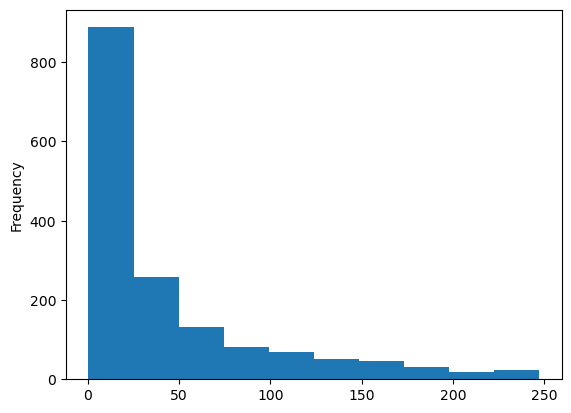

In [73]:
qcut_df[qcut_df['qcut_label'] == 0]['sales_mean'].plot.hist()

In [5]:
y_train_total, opt_lamda = boxcox(train_df['sales_mean'].values)

ValueError: Data must be positive.

In [ ]:
X_train_reg, y_train_reg = X_train[y_train == 1], y_train_total[y_train == 1]
X_test_reg, y_test_reg = X_test[y_pred_binary == 1], y_test[y_pred_binary == 1]

# y_train_boxcox, opt_lamda = boxcox(y_train_reg)
reg_model = linear_model.Ridge()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_boxcox = reg_model.predict(X_test_reg)
y_pred_boxcox = inv_boxcox(y_pred_boxcox, opt_lamda)

one_error = metric(y_pred_boxcox, y_test_reg)
print(one_error)
one_error = one_error * len(y_test_reg)

one_mean_error, one_median_error = metric([qcut_label_mean[1]]*len(y_test_reg), y_test_reg), metric([qcut_label_median[1]]*len(y_test_reg), y_test_reg)
print(one_mean_error, one_median_error)
one_mean_error, one_median_error = one_mean_error* len(y_test_reg), one_median_error* len(y_test_reg)

tensor(0.4667)
tensor(0.5133) tensor(0.4571)


In [60]:
X_train_reg, y_train_reg = X_train[y_train == 0], y_train_total[y_train == 0]
X_test_reg, y_test_reg = X_test[y_pred_binary == 0], y_test[y_pred_binary == 0]

# y_train_boxcox, opt_lamda = boxcox(y_train_reg)
reg_model = linear_model.Ridge()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_boxcox = reg_model.predict(X_test_reg)
y_pred_boxcox = inv_boxcox(y_pred_boxcox, opt_lamda)

zero_error = metric(y_pred_boxcox, y_test_reg)
print(zero_error)
zero_error = zero_error * len(y_test_reg)

y_pred_reg = [qcut_label_mean[0]] * len(y_test_reg)

zero_mean_error, zero_median_error = metric([qcut_label_mean[0]]*len(y_test_reg), y_test_reg), metric([qcut_label_median[0]]*len(y_test_reg), y_test_reg)
print(zero_mean_error, zero_median_error)
zero_mean_error, zero_median_error = zero_mean_error* len(y_test_reg), zero_median_error* len(y_test_reg)

# zero_error = metric(y_pred_reg, y_test_reg)
# print(zero_error)
# zero_error = zero_error * len(y_test_reg)

tensor(0.3020)
tensor(0.4937) tensor(0.3727)


In [17]:
print((one_error + zero_error) / len(test_df))
print((one_mean_error + zero_mean_error) / len(test_df))
print((one_median_error + zero_median_error) / len(test_df))

tensor(0.3310)
tensor(0.4604)
tensor(0.3735)
